In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep
from coffea.nanoevents.methods import vector
from coffea.nanoevents.methods import candidate
import timeit

In [2]:
parameters_dump = OmegaConf.load("/afs/cern.ch/user/r/rmccarth/private/ttH/ttHrunnew/PocketCoffea/AnalysisConfigs/configs/ttHbb/params/plotting_style.yaml")

In [3]:
def getName(sam_name):
    sam_namey = sam_name+'__2018'
    if 'ttHToNonbb' in sam_name: sam_namey ='ttHToNonbb_2018'
    if 'DYJetsToLL_M-50' in sam_name: sam_namey ='DYJetsToLL_M-50_v7__2018'
    if 'ZJetsToQQ' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'ST' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'QCD' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'WJets' in sam_name: sam_namey = sam_name + '_v7__2018' 
    if 'WJetsToLNu' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTWJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTGJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'THW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ZZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ttHTobb' in sam_name: sam_namey = sam_name + '_2018'
    return sam_namey

def getPlotParams(var):
    #return format: bins, xmin, xmax, label
    col = var.split("_")[0]
    quantity = var.split("_")[1]
    if quantity == 'eta':
        return 30, -2.5, 2.5, fr"{col} $\eta$"
    if quantity == 'phi':
        return 32, -math.pi, math.pi, fr"{col} $\phi$"
    if ("FatJet" in col) and not ("N" in quantity) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"FatJet $p_{T}$ [GeV]"
        elif quantity == 'mass':
            return 50, 0, 400, r"FatJet mass [GeV]"
        elif quantity == 'msoftdrop':
            return 50, 0, 400, r"FatJet $m_{SD}$ [GeV]"
        elif quantity == 'rho':
            return 100, -8, 0, r"FatJet $\rho$"
        elif quantity == 'rhoQCD':
            return 100, -3, 0.5, r"FatJet $\rho$QCD"
        elif quantity == 'tau1':
            return 20, 0, 1, r"$\tau_{1}$"
        elif quantity == 'tau2':
            return 20, 0, 1, r"$\tau_{2}$"
        elif quantity == 'tau3':
            return 20, 0, 1, r"$\tau_{3}$"
        elif quantity == 'tau4':
            return 20, 0, 1, r"$\tau_{4}$"
        elif quantity == 'btagDDBvLV2':
            return 50, 0, 1, f"{var}"
        else:
            return -1, -1, -1, f"{var}"
    elif ("Jet" in col) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"Jet $p_{T}$ [GeV]"
        elif quantity == 'btagDeepFlavB':
            return 30, 0, 1, "AK4 DeepJet b-tag score"
        elif quantity == 'mass':
            return 50, 0, 400, r"Jet mass [GeV]"
        elif quantity == 'N':
            return 8, 0, 8, fr"{col} N"
        else:
            return -1, -1, -1, f"{var}"
    elif ("Lepton" in col):
        if quantity == 'pt':
            return 30, 0, 300, r"Lepton $p_{T}$"
        else:
            return -1, -1, -1, f"{var}"
    else:
        return -1, -1, -1, f"{var}"
    
    
def deltaR(phis,etas):
    leftPhi,rightPhi = ak.unzip(phis)
    leftEta,rightEta = ak.unzip(etas)
    return np.sqrt(pow(leftEta-rightEta,2)+pow(leftPhi-rightPhi,2))

In [4]:
#o = load("/eos/user/r/rmccarth/ttHbb/coffeaFiles/merge.coffea")
o = load("/afs/cern.ch/user/a/asparker/public/ttHmain/PocketCoffea/AnalysisConfigs/configs/ttHbb/production_March20/output_March20_ALL_2018.coffea")

In [27]:
o['sum_genweights'].keys()

dict_keys(['DYJetsToLL_M-50_v7__2018', 'TTbbDiLeptonic_Powheg__2018', 'WJetsToLNu_HT-2500ToInf__2018', 'TTbbHadronic_Powheg__2018', 'WJetsToLNu_HT-400To600__2018', 'TTbbSemiLeptonic_Powheg__2018', 'WJetsToLNu_HT-600To800__2018', 'TTGJets__2018', 'WJetsToLNu_HT-800To1200__2018', 'QCD_HT1000to1500_v7__2018', 'ttHTobb_2018', 'WJetsToQQ_HT400to600_v7__2018', 'QCD_HT1500to2000_v7__2018', 'ttHToNonbb_2018', 'WJetsToQQ_HT600to800_v7__2018', 'QCD_HT2000toInf_v7__2018', 'TTTo2L2Nu__2018', 'WJetsToQQ_HT800toInf_v7__2018', 'QCD_HT500to700_v7__2018', 'TTToHadronic__2018', 'WW__2018', 'QCD_HT700to1000_v7__2018', 'TTToSemiLeptonic__2018', 'WZ__2018', 'ST_s-channel_4f_leptonDecays_v7__2018', 'TTWJetsToLNu__2018', 'ZJetsToQQ_HT400to600_v7__2018', 'ST_t-channel_antitop_4f_InclusiveDecays_v7__2018', 'TTWJetsToQQ__2018', 'ZJetsToQQ_HT600to800_v7__2018', 'ST_t-channel_top_4f_InclusiveDecays_v7__2018', 'TTZtoLLNuNu__2018', 'ZJetsToQQ_HT800toInf_v7__2018', 'ST_tW_antitop_5f_inclusiveDecays_v7__2018', 'TTZTo

In [19]:
p = {}
parquetDir = "/eos/cms/store/user/asparker/ttHboosted_March20/mergedFiles"
#for sample in os.listdir(parquetDir):
for sample in ["TTTo2L2Nu__"]:
    print(sample)
    p[sample] = {}
    #for cat in os.listdir(parquetDir+"/"+sample):
    for cat in ["baseline"]:
        p[sample][cat] = ak.from_parquet(parquetDir+"/"+sample+"/"+cat+"/nominal/merge.parquet")

TTTo2L2Nu__


In [24]:
p['TTTo2L2Nu__']['baseline'].fields

['weight_nominal',
 'weight_pileupUp',
 'weight_pileupDown',
 'weight_sf_ele_recoUp',
 'weight_sf_ele_recoDown',
 'weight_sf_ele_idUp',
 'weight_sf_ele_idDown',
 'weight_sf_mu_idUp',
 'weight_sf_mu_idDown',
 'weight_sf_mu_isoUp',
 'weight_sf_mu_isoDown',
 'weight_sf_jet_puIdUp',
 'weight_sf_jet_puIdDown',
 'weight_sf_btag_hfUp',
 'weight_sf_btag_hfDown',
 'weight_sf_btag_lfUp',
 'weight_sf_btag_lfDown',
 'weight_sf_btag_hfstats1Up',
 'weight_sf_btag_hfstats1Down',
 'weight_sf_btag_hfstats2Up',
 'weight_sf_btag_hfstats2Down',
 'weight_sf_btag_lfstats1Up',
 'weight_sf_btag_lfstats1Down',
 'weight_sf_btag_lfstats2Up',
 'weight_sf_btag_lfstats2Down',
 'weight_sf_btag_cferr1Up',
 'weight_sf_btag_cferr1Down',
 'weight_sf_btag_cferr2Up',
 'weight_sf_btag_cferr2Down',
 'JetGood_eta',
 'JetGood_pt',
 'JetGood_phi',
 'JetGood_btagDeepFlavB',
 'FatJetGood_eta',
 'FatJetGood_pt',
 'FatJetGood_phi',
 'FatJetGood_mass',
 'FatJetGood_msoftdrop',
 'FatJetGood_tau1',
 'FatJetGood_tau2',
 'FatJetGood_ta

2018 baseline JetGood_pt


/tmp/rmccarth/ipykernel_795913/3467213995.py:200: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_795913/3467213995.py:201: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_795913/3467213995.py:243: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_795913/3467213995.py:244: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


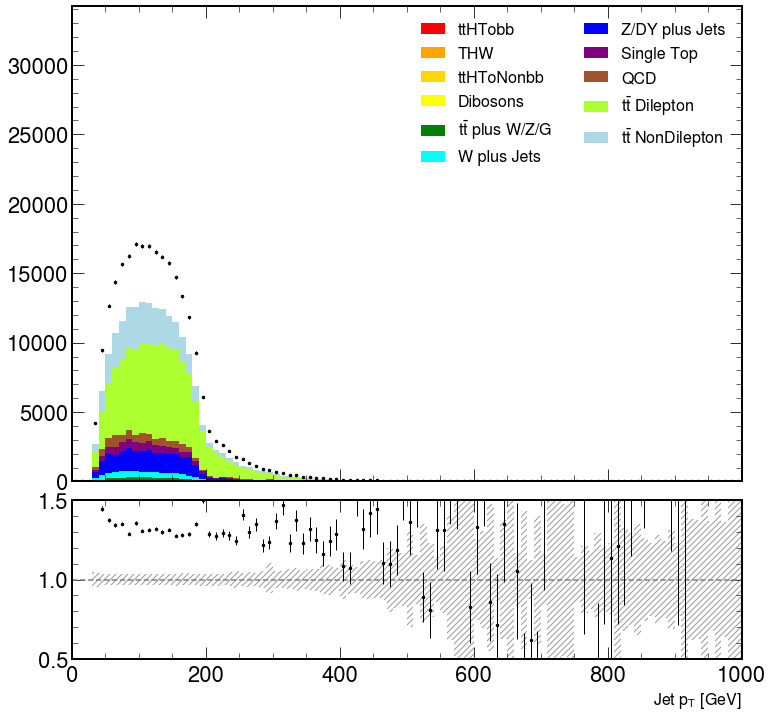

/tmp/rmccarth/ipykernel_795913/3467213995.py:290: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")


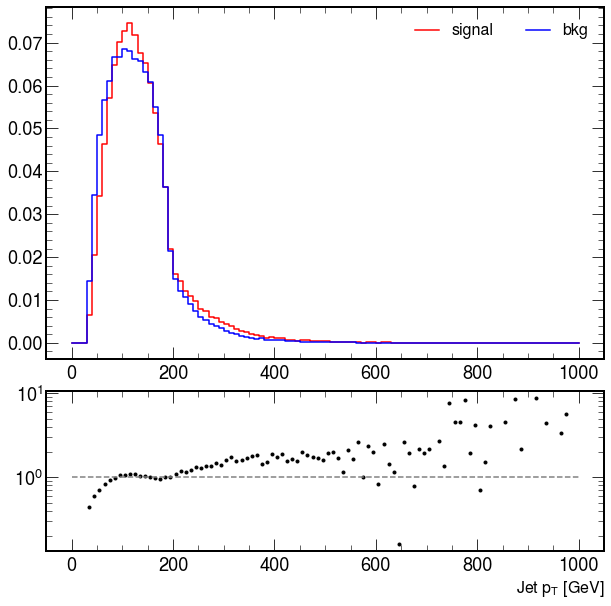

/tmp/rmccarth/ipykernel_795913/3467213995.py:308: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")


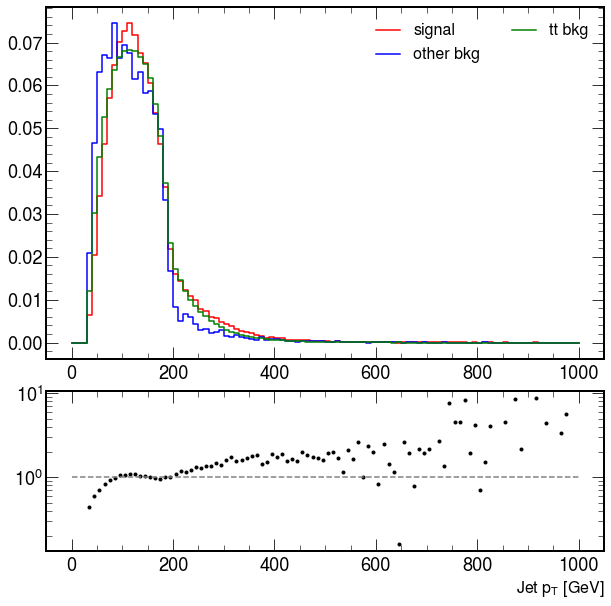

In [12]:
#User parameters
#cats = ["baseline","ee","emu","mumu"]
cats = ["baseline"]
colors = ["red","orange","gold","yellow","green","cyan","blue","purple","sienna","greenyellow","lightblue"]
vars = ["JetGood_pt"] #columns to plot, leave empty for all columns
modifier = "pt_1" #which objects to plot per event, options are: 'pt_#' where # goes from 1 to N with 1 being the leading pt object
                  #                                              'max' which plots the highest value of the parameter per event
                  #                                              'all' which plots all values of the parameter per event

dataSamples = []
for sample in p.keys():
    if 'DATA' in sample:
        dataSamples.append(sample)

for cat in cats:
    if(not len(vars)):
        vars = p['ttHTobb_2018']['baseline'].fields
    for var in vars:
        if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
            continue
        print("2018", cat, var)
        col = var.split("_")[0]
        quantity = var.split("_")[1]
        all_MC = {}
        all_weight = {}
        for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
            label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
            label_data = []
            label_weight = {}
            for sample in samples:
                weight = {}
                ttbb_weight = {}
                name = getName(sample)
                if(("V2" in var) and ("v7" in name)):
                    data = p[name][cat][var[:-2]]
                else:
                    data = p[name][cat][var]
                                       
                for weightVar in p[name][cat].fields:          
                    if ("weight" in weightVar):
                        weight[weightVar] = p[name][cat][weightVar]
                        weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                if(sample=="TTTo2L2Nu" or sample=="TTToSemiLeptonic" or sample=="TTToHadronic"):
                    if sample=="TTTo2L2Nu":
                        ttbbSample = 'TTbbDiLeptonic_Powheg__2018'
                    elif sample=="TTToSemiLeptonic":
                        ttbbSample = 'TTbbSemiLeptonic_Powheg__2018'
                    else:
                        ttbbSample = 'TTbbHadronic_Powheg__2018'
                    genTtbarId = p[name][cat]["events_genTtbarId"] % 100
                    tt_ttb_mask = genTtbarId > 50
                    
                    if(("V2" in var) and ("v7" in name)):
                        ttbb_data = p[ttbbSample][cat][var[:-2]]
                    else:
                        ttbb_data = p[ttbbSample][cat][var]
                    genTtbarId = p[ttbbSample][cat]["events_genTtbarId"] % 100
                    ttbb_ttb_mask = genTtbarId > 50
                    for weightVar in p[name][cat].fields:
                        if ("weight" in weightVar):
                            ttbb_weight[weightVar] = p[ttbbSample][cat][weightVar]
                            ttbb_weight[weightVar] = ttbb_weight[weightVar] / o['sum_genweights'][ttbbSample]
                            ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                            C = ak.sum(weight[weightVar][tt_ttb_mask])
                            D = ak.sum(ttbb_weight[weightVar])
                            ttbb_weight[weightVar] = ttbb_weight[weightVar] * (C/D)

                    for key in weight:
                        weight[key] = weight[key][~tt_ttb_mask]        
                    
                    if(quantity!="N" and col!="events"):
                        pt_data = p[name][cat][col+"_pt"]
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        ttbb_pt_data = p[ttbbSample][cat][col+"_pt"]
                        sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                        ttbb_data = ttbb_data[sortIndices]
                        if "pt" in modifier:
                            index = int(modifier.split("_")[1]) - 1
                            ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > index)[:, index]
                            data = ak.mask(data, ak.num(data) > index)[:, index]
                        elif modifier=="max":
                            data = ak.max(data,axis=1)
                            ttbb_data = ak.max(ttbb_data,axis=1)
                    data = data[~tt_ttb_mask]
                    ttbb_data = ttbb_data[ttbb_ttb_mask]
                    data = ak.concatenate((data,ttbb_data),axis=0)
                    for key in weight:
                        weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)

                elif(quantity!="N" and col!="events"):
                    pt_data = p[name][cat][col+"_pt"]
                    sortIndices = ak.argsort(pt_data,ascending=False)
                    data = data[sortIndices]
                    if "pt" in modifier:
                        index = int(modifier.split("_")[1]) - 1
                        data = ak.mask(data, ak.num(data) > index)[:, index]
                    elif modifier=="max":
                        data = ak.max(data,axis=1)
                for key in weight:
                    weight[key], data = ak.broadcast_arrays(weight[key],data)
                    if(modifier=="all" and quantity!="N" and col!="events"):
                        weight[key] = ak.flatten(weight[key])
                if(modifier=="all" and quantity!="N" and col!="events"): 
                    data = ak.flatten(data)
                none_mask = ak.is_none(data)
                data = data[~none_mask]
                for key in weight:
                    weight[key] = weight[key][~none_mask]
                inf_mask = np.isinf(data)
                data = data[~inf_mask]
                for key in weight:
                    weight[key] = weight[key][~inf_mask]
                label_data = ak.concatenate((label_data,data),axis=0)
                for key in weight:
                    if key not in label_weight:
                        label_weight[key] = []
                    label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
            all_MC[label] = label_data
            for key in label_weight:
                if key not in all_weight:
                    all_weight[key] = {}
                all_weight[key][label] = label_weight[key]

        bins, xmin, xmax, xlabel = getPlotParams(var)
        plt.style.use([hep.style.ROOT, {'font.size': 22}])
        f2, a2 = plt.subplots()
        if not ("Gen" in var) and not ("gen" in var):
            fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
            fig.subplots_adjust(hspace=0.06)
            if(bins==-1):
                n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),color=colors)
            else:
                n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax),color=colors)
            signal_n, signal_bins = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"],bins=bin_edges)
            ttdilepton_n, ttdilepton_bins = np.histogram(all_MC["$t\\bar{t}$ Dilepton"],weights=all_weight["weight_nominal"]["$t\\bar{t}$ Dilepton"],bins=bin_edges)
            ttnondilepton_n, ttnondilepton_bins = np.histogram(all_MC["$t\\bar{t}$ NonDilepton"],weights=all_weight["weight_nominal"]["$t\\bar{t}$ NonDilepton"],bins=bin_edges)
            signal_mcstaterr2 = np.histogram(all_MC["ttHTobb"],weights=all_weight["weight_nominal"]["ttHTobb"]**2,bins=bin_edges)[0]
            bg_mcstaterr2 = 0
            tt_n = ttdilepton_n + ttnondilepton_n
            bg_n = n[-1] - signal_n
            bg_nott = n[-1] - signal_n - tt_n
            signal_n = signal_n / ak.sum(signal_n)
            bg_n = bg_n / ak.sum(bg_n)
            bg_nott = bg_nott / ak.sum(bg_nott)
            tt_n = tt_n / ak.sum(tt_n)
            
            n_sys = {}
            for key in all_weight:
                if "Down" in key:
                    continue
                downString = key[:-2]+"Down"
                err2_up_total = np.zeros_like(n[-1])
                err2_down_total = np.zeros_like(n[-1])
                for label in all_weight[key]:
                    if key=="weight_nominal":
                        mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                        err2_up_total += mcstat_err2
                        err2_down_total += mcstat_err2
                        bg_mcstaterr2 += mcstat_err2
                    else:
                        hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                        hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                        hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                        err_up = hist_n_up - hist_n
                        err_down = hist_n_down - hist_n
                        # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                        up_is_up = err_up > 0
                        down_is_down = err_down < 0
                        # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                        is_onesided = up_is_up ^ down_is_down
                        # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                        err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                        err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                        err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                        err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                        err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                        err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                        err2_down_combined = np.where(
                            is_onesided, err2_down_onesided, err2_down_twosided
                        )
                        err2_up_total += err2_up_combined
                        err2_down_total += err2_down_combined
                n_sys[key] = err2_up_total
                n_sys[downString] = err2_down_total
            ax.tick_params(axis='x', labelsize=22)
            ax.tick_params(axis='y', labelsize=22)
            ax.set_xlim(bin_edges[0],bin_edges[-1])
            #systematic error band
            err2_up = np.zeros_like(n[-1])
            err2_down = np.zeros_like(n[-1])
            for key in n_sys:
                if "Down" in key:
                    continue
                downString = key[:-2]+"Down"
                err2_up += n_sys[key]
                err2_down += n_sys[downString]
            up = n[-1] + np.sqrt(err2_up)
            down = n[-1] - np.sqrt(err2_down)
            ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
            ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
            unc_band = np.array([ratio_down, ratio_up])
            rax.fill_between(
                bin_edges,
                np.r_[unc_band[0], unc_band[0, -1]],
                np.r_[unc_band[1], unc_band[1, -1]],
                label="syst. unc.",
                color= [0.,0.,0.,0.4],
                facecolor= [0.,0.,0.,0.],
                hatch= "////",
                linewidth= 0,
                step= 'post',
                zorder= 2
            )
            rax.hlines(
                1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
            )

            ax.legend(ncol=2,loc="upper right",fontsize=16)
            plt.xlabel(xlabel,fontsize=16)
            nData = [0.0]*len(bin_edges[:-1])
            for sample in dataSamples:
                data = p[sample][cat][var]
                if(quantity!="N" and col!="events"): 
                    pt_data = p[sample][cat][col+"_pt"]
                    sortIndices = ak.argsort(pt_data,ascending=False)
                    data = data[sortIndices]
                    if "pt" in modifier:
                        index = int(modifier.split("_")[1]) - 1
                        data = ak.mask(data, ak.num(data) > index)[:, index]
                    elif modifier=="max":
                        data = ak.max(data,axis=1)
                none_mask = ak.is_none(data)
                data = data[~none_mask]
                inf_mask = np.isinf(data)
                data = data[~inf_mask]
                if(modifier=="all" and quantity!="N" and col!="events"):
                    data = ak.flatten(data)
                n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                nData += n_data
            error = np.sqrt(nData)
            binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
            ratio = nData/n[-1]
            ratio_error = error/n[-1]
            ratio_error[np.isnan(ratio_error)] = np.inf
            ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
            #ax.set_yscale("log")
            rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
            rax.set_ylim((0.5, 1.5))
            rax.yaxis.set_label_coords(-0.075, 1)
            rax.tick_params(axis='x', labelsize=22)
            rax.tick_params(axis='y', labelsize=22)
            max_data = max(nData)
            max_MC = max(n[-1])
            if(max_data>max_MC):
                ax.set_ylim((0, 2.0 * max_data))
            else:
                ax.set_ylim((0, 2.0 * max_MC))
        else:
            f1, a1 = plt.subplots()
            if(bins==-1):
                n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
            else:
                n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
            ax.legend(ncol=2,loc="upper right")

        plt.close(f2)
        if "pt" in modifier:
            stringMod = modifier.split("_")[1]
        else:
            stringMod = modifier
        filepath = f"hists_fixMerge/2018/{cat}/{col}"
        if not os.path.exists(filepath):
            os.makedirs(filepath)
        plt.savefig(filepath+"/"+var+"_"+stringMod+".pdf")
        plt.show()
        plt.clf()
        plt.cla()
        #normalized signal vs bg
        binCenters = (bin_edges[:-1] + bin_edges[1:]) / 2
        bg_mcstaterr2 = bg_mcstaterr2 - signal_mcstaterr2
        plt.figure(1)
        ax1 = plt.subplot(3,1,(1,2))
        signal_n = np.append(signal_n,signal_n[-1])
        bg_n = np.append(bg_n,bg_n[-1])
        plt.step(bin_edges,signal_n,color="red",label="signal",where="post")
        plt.step(bin_edges,bg_n,color="blue",label="bkg",where="post")
        ax1.legend(ncol=2,loc="upper right",fontsize=16)
        ax2 = plt.subplot(3,1,3,sharex=ax1)
        plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")
        ax2.hlines(
                1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
            )
        ax2.set_yscale("log")
        plt.xlabel(xlabel,fontsize=16)
        plt.show()
        plt.close()
        #normalized signal vs tt vs other bg
        plt.figure(2)
        ax1 = plt.subplot(3,1,(1,2))
        tt_n = np.append(tt_n,tt_n[-1])
        bg_nott = np.append(bg_nott,bg_nott[-1])
        plt.step(bin_edges,signal_n,color="red",label="signal",where="post")
        plt.step(bin_edges,bg_nott,color="blue",label="other bkg",where="post")
        plt.step(bin_edges,tt_n,color="green",label="tt bkg",where="post")
        ax1.legend(ncol=2,loc="upper right",fontsize=16)
        ax2 = plt.subplot(3,1,3,sharex=ax1)
        plt.scatter(binCenters,signal_n[:-1]/bg_n[:-1],color="black",marker=".")
        ax2.hlines(
                1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
            )
        ax2.set_yscale("log")
        plt.xlabel(xlabel,fontsize=16)
        plt.show()
        plt.close()

In [8]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep
from coffea.nanoevents.methods import vector
from coffea.nanoevents.methods import candidate

o = load("/afs/cern.ch/user/a/asparker/public/ttHmain/PocketCoffea/AnalysisConfigs/configs/ttHbb/production_March20/output_March20_ALL_2018.coffea")
ElectronIsoWP = [0.40]#[0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]
MuonPFIsoWP = [0.40]#[0.40,0.25,0.20,0.15,0.10,0.05]
#MuonTkIsoWP = [0.10,0.05]
MuonMiniIsoWP = [0.40]#[0.40,0.20,0.10,0.05]
BBWorkingPoints = [0.0399] #[0.3140,0.1566,0.0399] #Note, the newest paper from BTV on bbtagging references WPs but doesn't seem to list them
ElectronIsoCollections = ["miniPFRelIso_chg"]#["jetRelIso", "pfRelIso03_all","miniPFRelIso_all", "pfRelIso03_chg","miniPFRelIso_chg", "dr03EcalRecHitSumEt", "dr03HcalDepth1TowerSumEt", "dr03TkSumPt", "dr03TkSumPtHEEP"]
MuonIsoCollections = ["miniPFRelIso_chg"]#["jetRelIso","pfRelIso03_all", "miniPFRelIso_all" , "pfRelIso03_chg","miniPFRelIso_chg", "pfRelIso04_all"]
#f = open("isoOptimizationNewCutFlows.txt", "w")

for muonIso in MuonIsoCollections:
    if "mini" in muonIso:
        muonWPs = MuonMiniIsoWP
    else:
        muonWPs = MuonPFIsoWP
    for eleIso in ElectronIsoCollections:
        p = {}
        parquetDir = "/afs/cern.ch/work/r/rmccarth/public/mergedFiles"
        for sample in os.listdir(parquetDir):
            if(("TTbb" in sample) or ("DATA" in sample)):
                continue
            if(sample[-1]=="_"):
                name = sample+ "2018"
            else:
                name = sample
            print(name)
            p[name] = {}
            if("v7" in sample):
                bbtag = "FatJetGood_btagDDBvL"
            else:
                bbtag = "FatJetGood_btagDDBvLV2"
            for cat in ["baseline"]:
                p[name][cat] = ak.from_parquet(parquetDir+"/"+sample+"/"+cat+"/nominal/merge.parquet",columns=["ElectronGood_eta","ElectronGood_phi","ElectronGood_pt","ElectronGood_mass","ElectronGood_charge","MuonGood_eta","MuonGood_phi","MuonGood_pt","MuonGood_mass","MuonGood_charge","FatJetGood_eta","FatJetGood_phi","FatJetGood_pt","FatJetGood_mass","JetGood_eta","JetGood_phi","JetGood_pt",bbtag,"ElectronGood_"+eleIso,"MuonGood_"+muonIso,"weight_nominal","MET_pt"])
        for muonWP in muonWPs:
            for eleWP in ElectronIsoWP:
                for bbWP in BBWorkingPoints:
                    cutFlow = {}
                    weightSquared = {}
                    for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                        label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
                        cutFlow[label] = {"Initial": 0.0, "MET": 0.0, "nLepMinPt": 0.0, "DilepMassAndCharge": 0.0, "FatJetMinPt": 0.0, "nJet": 0.0}
                        weightSquared[label] = {"Initial": 0.0, "MET": 0.0, "nLepMinPt": 0.0, "DilepMassAndCharge": 0.0, "FatJetMinPt": 0.0, "nJet": 0.0}
                        for sample in samples:
                            name = getName(sample)
                            if(("TTbb" in sample) or ("DATA" in sample)):
                                continue
                            #print(sample,"muonIso",muonIso,"WP",muonWP,"eleIso",eleIso,"WP",eleWP,"bbWP",bbWP)
                            for cat in ["baseline"]:
                                eleMask = p[name][cat]["ElectronGood_"+eleIso]<eleWP
                                muonMask = p[name][cat]["MuonGood_"+muonIso]<muonWP
                                if("v7" in name):
                                    fatMask = p[name][cat]["FatJetGood_btagDDBvL"]>bbWP
                                else:
                                    fatMask = p[name][cat]["FatJetGood_btagDDBvLV2"]>bbWP
                                lepEta = ak.concatenate((p[name][cat]["ElectronGood_eta"][eleMask],p[name][cat]["MuonGood_eta"][muonMask]),axis=1)
                                lepPhi = ak.concatenate((p[name][cat]["ElectronGood_phi"][eleMask],p[name][cat]["MuonGood_phi"][muonMask]),axis=1)
                                lepPt = ak.concatenate((p[name][cat]["ElectronGood_pt"][eleMask],p[name][cat]["MuonGood_pt"][muonMask]),axis=1)
                                lepMass = ak.concatenate((p[name][cat]["ElectronGood_mass"][eleMask],p[name][cat]["MuonGood_mass"][muonMask]),axis=1)
                                lepCharge = ak.concatenate((p[name][cat]["ElectronGood_charge"][eleMask],p[name][cat]["MuonGood_charge"][muonMask]),axis=1)
                                fatEta = p[name][cat]["FatJetGood_eta"][fatMask]
                                fatPhi = p[name][cat]["FatJetGood_phi"][fatMask]
                                fatPt = p[name][cat]["FatJetGood_pt"][fatMask]
                                fatMass = p[name][cat]["FatJetGood_mass"][fatMask]
                                jetEta = p[name][cat]["JetGood_eta"]
                                jetPhi = p[name][cat]["JetGood_phi"]
                                jetPt = p[name][cat]["JetGood_pt"]
                                weights = p[name][cat]['weight_nominal'] / o['sum_genweights'][name]
                                cutFlow[label]["Initial"] += ak.sum(weights)
                                weightSquared[label]["Initial"] += ak.sum(weights**2)

                                met = p[name][cat]["MET_pt"]
                                met_mask = met > 5
                                lepEta = lepEta[met_mask]
                                lepPhi = lepPhi[met_mask]
                                lepPt = lepPt[met_mask]
                                lepMass = lepMass[met_mask]
                                lepCharge = lepCharge[met_mask]
                                fatEta = fatEta[met_mask]
                                fatPhi = fatPhi[met_mask]
                                fatPt = fatPt[met_mask]
                                fatMass = fatMass[met_mask]
                                jetEta = jetEta[met_mask]
                                jetPhi = jetPhi[met_mask]
                                jetPt = jetPt[met_mask]
                                weights = weights[met_mask]
                                cutFlow[label]["MET"] += ak.sum(weights)
                                weightSquared[label]["MET"] += ak.sum(weights**2)
                                
                                nlep = ak.num(lepEta,axis=1)
                                lep_mask = (nlep==2) & (ak.sum(lepPt>=25.0,axis=1)>=2)
                                lepEta = lepEta[lep_mask]
                                lepPhi = lepPhi[lep_mask]
                                lepPt = lepPt[lep_mask]
                                lepMass = lepMass[lep_mask]
                                lepCharge = lepCharge[lep_mask]
                                fatEta = fatEta[lep_mask]
                                fatPhi = fatPhi[lep_mask]
                                fatPt = fatPt[lep_mask]
                                fatMass = fatMass[lep_mask]
                                jetEta = jetEta[lep_mask]
                                jetPhi = jetPhi[lep_mask]
                                jetPt = jetPt[lep_mask]
                                weights = weights[lep_mask]
                                cutFlow[label]["nLepMinPt"] += ak.sum(weights)
                                weightSquared[label]["nLepMinPt"] += ak.sum(weights**2)
                                
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                "charge": lepCharge
                                },
                                with_name="PtEtaPhiMCandidate",
                                behavior= candidate.behavior,
                                )
                                ll = lep4Vec[:,0]+lep4Vec[:,1]
                                ll_charge = getattr(ll,"charge")
                                ll_mass = getattr(ll,"mass")

                                min_mass = (ll_mass>20) & (ll_mass<76)
                                mass_window = ll_mass>106
                                mass_cut = (min_mass) | (mass_window)
                                dilep_mask = mass_cut & (ll_charge==0)

                                lepEta = lepEta[dilep_mask]
                                lepPhi = lepPhi[dilep_mask]
                                lepPt = lepPt[dilep_mask]
                                lepMass = lepMass[dilep_mask]
                                lepCharge = lepCharge[dilep_mask]
                                fatEta = fatEta[dilep_mask]
                                fatPhi = fatPhi[dilep_mask]
                                fatPt = fatPt[dilep_mask]
                                fatMass = fatMass[dilep_mask]
                                jetEta = jetEta[dilep_mask]
                                jetPhi = jetPhi[dilep_mask]
                                jetPt = jetPt[dilep_mask]
                                weights = weights[dilep_mask]
                                cutFlow[label]["DilepMassAndCharge"] += ak.sum(weights)
                                weightSquared[label]["DilepMassAndCharge"] += ak.sum(weights**2)
                                
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                fat4Vec = ak.zip(
                                {
                                "pt": fatPt,
                                "eta": fatEta,
                                "phi": fatPhi,
                                "mass": fatMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                fatJetLeptonDeltaR = fat4Vec.metric_table(lep4Vec)
                                #print("lepEta",lepEta)
                                #print("fatEta",fatEta)
                                #print("fatjetLeptonEta",fatjetLeptonEta)
                                #print("fatjetLeptonPhi",fatjetLeptonPhi)
                                #print(fatJetLeptonDeltaR)
                                mask_lepton_cleaning = ak.prod(fatJetLeptonDeltaR > 0.8, axis=2) == 1
                                fatEta = fatEta[mask_lepton_cleaning]
                                fatPhi = fatPhi[mask_lepton_cleaning]
                                fatPt = fatPt[mask_lepton_cleaning]
                                fatMass = fatMass[mask_lepton_cleaning]
                                fatPt_mask = ak.sum(fatPt>=200,axis=1)>=1

                                lepEta = lepEta[fatPt_mask]
                                lepPhi = lepPhi[fatPt_mask]
                                lepPt = lepPt[fatPt_mask]
                                lepMass = lepMass[fatPt_mask]
                                lepCharge = lepCharge[fatPt_mask]
                                fatEta = fatEta[fatPt_mask]
                                fatPhi = fatPhi[fatPt_mask]
                                fatPt = fatPt[fatPt_mask]
                                fatMass = fatMass[fatPt_mask]
                                jetEta = jetEta[fatPt_mask]
                                jetPhi = jetPhi[fatPt_mask]
                                jetPt = jetPt[fatPt_mask]
                                weights = weights[fatPt_mask]
                                cutFlow[label]["FatJetMinPt"] += ak.sum(weights)
                                weightSquared[label]["FatJetMinPt"] += ak.sum(weights**2)
                                #print(mask_lepton_cleaning)
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jet4Vec = ak.zip(
                                {
                                "pt": jetPt,
                                "eta": jetEta,
                                "phi": jetPhi,
                                "mass": jetEta
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jetLeptonDeltaR = jet4Vec.metric_table(lep4Vec)
                                mask_lepton_cleaning = ak.prod(jetLeptonDeltaR > 0.4, axis=2) == 1
                                jetEta = jetEta[mask_lepton_cleaning]
                                jetPhi = jetPhi[mask_lepton_cleaning]
                                jetPt = jetPt[mask_lepton_cleaning]
                                fat4Vec = ak.zip(
                                {
                                "pt": fatPt,
                                "eta": fatEta,
                                "phi": fatPhi,
                                "mass": fatMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jet4Vec = ak.zip(
                                {
                                "pt": jetPt,
                                "eta": jetEta,
                                "phi": jetPhi,
                                "mass": jetEta
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jetFatJetDeltaR = jet4Vec.metric_table(fat4Vec)
                                mask_fatjet_cleaning = ak.prod(jetFatJetDeltaR > 0.8, axis=2) == 1
                                #print("num jets removed",ak.sum(mask_fatjet_cleaning==0))
                                jetEta = jetEta[mask_fatjet_cleaning]
                                jetPhi = jetPhi[mask_fatjet_cleaning]
                                njet = ak.num(jetEta,axis=1)

                                eventMask = (njet>=2)
                                #print("ll_charge",ll_charge)
                                #print("ll_mass",ll_mass)
                                #print("lepPt",lepPt)
                                #print("njet",njet)
                                #print("mass_cut",mass_cut)
                                #print("eventMask",eventMask)
                                #print("len eventMask",len(eventMask))
                                #print("num pass",ak.sum(eventMask))

                                weights = weights[eventMask]
                                #print("weight sum",ak.sum(weights))
                                cutFlow[label]["nJet"] += ak.sum(weights)
                                weightSquared[label]["nJet"] += ak.sum(weights**2)

                    for cat in ["baseline"]:
                        # Define LaTeX table header
                        latex_table = "\\begin{table}[htbp]\n"
                        latex_table += "\\centering\n"
                        latex_table += "\\resizebox{\\textwidth}{!}{\\begin{tabular}{|l|c|c|c|c|c|c|}\n"
                        latex_table += "\\hline\n"
                        latex_table += "Process & Initial & MET & nLepMinPt & DilepMassAndCharge & FatJetMinPt & nJet \\\\\n"
                        latex_table += "\\hline\n"
                        for label in cutFlow.keys():
                            latex_table += f"{label} & {cutFlow[label]['Initial']:.0f} $\pm$ {np.sqrt(weightSquared[label]['Initial']):.2f} & {cutFlow[label]['MET']:.0f} $\pm$ {np.sqrt(weightSquared[label]['MET']):.2f} & {cutFlow[label]['nLepMinPt']:.0f} $\pm$ {np.sqrt(weightSquared[label]['nLepMinPt']):.2f} & {cutFlow[label]['DilepMassAndCharge']:.0f} $\pm$ {np.sqrt(weightSquared[label]['DilepMassAndCharge']):.2f} & {cutFlow[label]['FatJetMinPt']:.0f} $\pm$ {np.sqrt(weightSquared[label]['FatJetMinPt']):.2f} & {cutFlow[label]['nJet']:.0f} $\pm$ {np.sqrt(weightSquared[label]['nJet']):.2f} \\\\\n"
                        latex_table += "\\hline\n"
                        latex_table += "s/sqrt(b)"
                        for cut in cutFlow["ttHTobb"].keys():
                            signal = cutFlow["ttHTobb"][cut]
                            signal_err = np.sqrt(weightSquared["ttHTobb"][cut])
                            signal_relErr = signal_err /signal
                            background = 0
                            background_err = 0
                            for label in cutFlow.keys():
                                if "ttHTobb" in label:
                                    continue
                                background += cutFlow[label][cut]
                                background_err += weightSquared[label][cut]
                            background_err = np.sqrt(background_err)
                            background_relErr = background_err / background
                            sensitivity = signal / np.sqrt(background)
                            sensitivity_relErr = np.sqrt(signal_relErr**2 + ( (1/4) * (background_relErr**2) ) )
                            sensitivity_err = sensitivity * sensitivity_relErr
                            latex_table+=f" & {sensitivity:.4f} $\pm$ {sensitivity_err:.4f}"
                        latex_table+=f"\\\\\n"    
                        latex_table += "\\hline\n"
                        latex_table += "\\end{tabular}}\n"
                        latex_table += "\\caption{New Selection Cutflow table}\n"
                        latex_table += "\\label{tab:cutflow}\n"
                        latex_table += "\\end{table}"

                        # Print the LaTeX table
                        print(latex_table)
#f.close()


TTTo2L2Nu__2018
ttHTobb_2018
ttHToNonbb_2018
THW__2018
TTToSemiLeptonic__2018
WW__2018
ZZ__2018
WZ__2018
WJetsToLNu_HT-200To400__2018
WJetsToLNu_HT-400To600__2018
WJetsToLNu_HT-600To800__2018
WJetsToLNu_HT-800To1200__2018
WJetsToLNu_HT-1200To2500__2018
WJetsToLNu_HT-2500ToInf__2018
WJetsToQQ_HT400to600_v7__2018
WJetsToQQ_HT600to800_v7__2018
WJetsToQQ_HT800toInf_v7__2018
ZJetsToQQ_HT400to600_v7__2018
ZJetsToQQ_HT600to800_v7__2018
ZJetsToQQ_HT800toInf_v7__2018
ST_s-channel_4f_leptonDecays_v7__2018
ST_t-channel_top_4f_InclusiveDecays_v7__2018
ST_t-channel_antitop_4f_InclusiveDecays_v7__2018
ST_tW_top_5f_inclusiveDecays_v7__2018
ST_tW_antitop_5f_inclusiveDecays_v7__2018
QCD_HT500to700_v7__2018
QCD_HT700to1000_v7__2018
QCD_HT1000to1500_v7__2018
QCD_HT1500to2000_v7__2018
QCD_HT2000toInf_v7__2018
TTToHadronic__2018
TTZToQQ__2018
TTZtoLLNuNu__2018
TTWJetsToQQ__2018
TTWJetsToLNu__2018
TTGJets__2018
DYJetsToLL_M-50_v7__2018
\begin{table}[htbp]
\centering
\resizebox{\textwidth}{!}{\begin{tabular}

In [5]:
#Old Selection Code
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep
from coffea.nanoevents.methods import vector
from coffea.nanoevents.methods import candidate

o = load("/afs/cern.ch/user/a/asparker/public/ttHmain/PocketCoffea/AnalysisConfigs/configs/ttHbb/production_March20/output_March20_ALL_2018.coffea")
ElectronIsoWP = [0.06]#[0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]
MuonPFIsoWP = [0.25]#[0.40,0.25,0.20,0.15,0.10,0.05]
#MuonTkIsoWP = [0.10,0.05]
MuonMiniIsoWP = [0.25]#[0.40,0.20,0.10,0.05]
BBWorkingPoints = [0.0] #[0.3140,0.1566,0.0399] #Note, the newest paper from BTV on bbtagging references WPs but doesn't seem to list them
ElectronIsoCollections = ["pfRelIso03_all"]#["jetRelIso", "pfRelIso03_all","miniPFRelIso_all", "pfRelIso03_chg","miniPFRelIso_chg", "dr03EcalRecHitSumEt", "dr03HcalDepth1TowerSumEt", "dr03TkSumPt", "dr03TkSumPtHEEP"]
MuonIsoCollections = ["pfRelIso04_all"]#["jetRelIso","pfRelIso03_all", "miniPFRelIso_all" , "pfRelIso03_chg","miniPFRelIso_chg", "pfRelIso04_all"]
#f = open("isoOptimizationNewCutFlows.txt", "w")

for muonIso in MuonIsoCollections:
    if "mini" in muonIso:
        muonWPs = MuonMiniIsoWP
    else:
        muonWPs = MuonPFIsoWP
    for eleIso in ElectronIsoCollections:
        p = {}
        parquetDir = "/afs/cern.ch/work/r/rmccarth/public/mergedFiles"
        for sample in os.listdir(parquetDir):
            if(("TTbb" in sample) or ("DATA" in sample)):
                continue
            if(sample[-1]=="_"):
                name = sample+ "2018"
            else:
                name = sample
            print(name)
            p[name] = {}
            if("v7" in sample):
                bbtag = "FatJetGood_btagDDBvL"
            else:
                bbtag = "FatJetGood_btagDDBvLV2"
            for cat in ["baseline"]:
                p[name][cat] = ak.from_parquet(parquetDir+"/"+sample+"/"+cat+"/nominal/merge.parquet",columns=["ElectronGood_eta","ElectronGood_phi","ElectronGood_pt","ElectronGood_mass","ElectronGood_charge","MuonGood_eta","MuonGood_phi","MuonGood_pt","MuonGood_mass","MuonGood_charge","FatJetGood_eta","FatJetGood_phi","FatJetGood_pt","FatJetGood_mass","JetGood_eta","JetGood_phi","JetGood_pt",bbtag,"ElectronGood_"+eleIso,"MuonGood_"+muonIso,"weight_nominal","MET_pt"])
        for muonWP in muonWPs:
            for eleWP in ElectronIsoWP:
                for bbWP in BBWorkingPoints:
                    cutFlow = {}
                    weightSquared = {}
                    for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                        label = parameters_dump['plotting_style']['labels_mc'].get(label, label)
                        cutFlow[label] = {"Initial": 0.0, "MET": 0.0, "nLepMinPt": 0.0, "DilepMassAndCharge": 0.0, "nJet": 0.0}
                        weightSquared[label] = {"Initial": 0.0, "MET": 0.0, "nLepMinPt": 0.0, "DilepMassAndCharge": 0.0, "nJet": 0.0}
                        for sample in samples:
                            name = getName(sample)
                            if(("TTbb" in sample) or ("DATA" in sample)):
                                continue
                            print(sample,"muonIso",muonIso,"WP",muonWP,"eleIso",eleIso,"WP",eleWP,"bbWP",bbWP)
                            for cat in ["baseline"]:
                                eleMask = p[name][cat]["ElectronGood_"+eleIso]<eleWP
                                muonMask = p[name][cat]["MuonGood_"+muonIso]<muonWP
                                if("v7" in name):
                                    fatMask = p[name][cat]["FatJetGood_btagDDBvL"]>bbWP
                                else:
                                    fatMask = p[name][cat]["FatJetGood_btagDDBvLV2"]>bbWP
                                lepEta = ak.concatenate((p[name][cat]["ElectronGood_eta"][eleMask],p[name][cat]["MuonGood_eta"][muonMask]),axis=1)
                                lepPhi = ak.concatenate((p[name][cat]["ElectronGood_phi"][eleMask],p[name][cat]["MuonGood_phi"][muonMask]),axis=1)
                                lepPt = ak.concatenate((p[name][cat]["ElectronGood_pt"][eleMask],p[name][cat]["MuonGood_pt"][muonMask]),axis=1)
                                lepMass = ak.concatenate((p[name][cat]["ElectronGood_mass"][eleMask],p[name][cat]["MuonGood_mass"][muonMask]),axis=1)
                                lepCharge = ak.concatenate((p[name][cat]["ElectronGood_charge"][eleMask],p[name][cat]["MuonGood_charge"][muonMask]),axis=1)
                                fatEta = p[name][cat]["FatJetGood_eta"][fatMask]
                                fatPhi = p[name][cat]["FatJetGood_phi"][fatMask]
                                fatPt = p[name][cat]["FatJetGood_pt"][fatMask]
                                fatMass = p[name][cat]["FatJetGood_mass"][fatMask]
                                jetEta = p[name][cat]["JetGood_eta"]
                                jetPhi = p[name][cat]["JetGood_phi"]
                                jetPt = p[name][cat]["JetGood_pt"]
                                weights = p[name][cat]['weight_nominal'] / o['sum_genweights'][name]
                                cutFlow[label]["Initial"] += ak.sum(weights)
                                weightSquared[label]["Initial"] += ak.sum(weights**2)

                                met = p[name][cat]["MET_pt"]
                                met_mask = met > 40
                                lepEta = lepEta[met_mask]
                                lepPhi = lepPhi[met_mask]
                                lepPt = lepPt[met_mask]
                                lepMass = lepMass[met_mask]
                                lepCharge = lepCharge[met_mask]
                                fatEta = fatEta[met_mask]
                                fatPhi = fatPhi[met_mask]
                                fatPt = fatPt[met_mask]
                                fatMass = fatMass[met_mask]
                                jetEta = jetEta[met_mask]
                                jetPhi = jetPhi[met_mask]
                                jetPt = jetPt[met_mask]
                                weights = weights[met_mask]
                                cutFlow[label]["MET"] += ak.sum(weights)
                                weightSquared[label]["MET"] += ak.sum(weights**2)
                                
                                nlep = ak.num(lepEta,axis=1)
                                lep_mask = (nlep==2) & (ak.sum(lepPt>=25.0,axis=1)>=2)
                                lepEta = lepEta[lep_mask]
                                lepPhi = lepPhi[lep_mask]
                                lepPt = lepPt[lep_mask]
                                lepMass = lepMass[lep_mask]
                                lepCharge = lepCharge[lep_mask]
                                fatEta = fatEta[lep_mask]
                                fatPhi = fatPhi[lep_mask]
                                fatPt = fatPt[lep_mask]
                                fatMass = fatMass[lep_mask]
                                jetEta = jetEta[lep_mask]
                                jetPhi = jetPhi[lep_mask]
                                jetPt = jetPt[lep_mask]
                                weights = weights[lep_mask]
                                cutFlow[label]["nLepMinPt"] += ak.sum(weights)
                                weightSquared[label]["nLepMinPt"] += ak.sum(weights**2)
                                
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                "charge": lepCharge
                                },
                                with_name="PtEtaPhiMCandidate",
                                behavior= candidate.behavior,
                                )
                                ll = lep4Vec[:,0]+lep4Vec[:,1]
                                ll_charge = getattr(ll,"charge")
                                ll_mass = getattr(ll,"mass")

                                min_mass = (ll_mass>20) & (ll_mass<76)
                                mass_window = ll_mass>106
                                mass_cut = (min_mass) | (mass_window)
                                dilep_mask = mass_cut & (ll_charge==0)

                                lepEta = lepEta[dilep_mask]
                                lepPhi = lepPhi[dilep_mask]
                                lepPt = lepPt[dilep_mask]
                                lepMass = lepMass[dilep_mask]
                                lepCharge = lepCharge[dilep_mask]
                                fatEta = fatEta[dilep_mask]
                                fatPhi = fatPhi[dilep_mask]
                                fatPt = fatPt[dilep_mask]
                                fatMass = fatMass[dilep_mask]
                                jetEta = jetEta[dilep_mask]
                                jetPhi = jetPhi[dilep_mask]
                                jetPt = jetPt[dilep_mask]
                                weights = weights[dilep_mask]
                                cutFlow[label]["DilepMassAndCharge"] += ak.sum(weights)
                                weightSquared[label]["DilepMassAndCharge"] += ak.sum(weights**2)
                                
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                fat4Vec = ak.zip(
                                {
                                "pt": fatPt,
                                "eta": fatEta,
                                "phi": fatPhi,
                                "mass": fatMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                fatJetLeptonDeltaR = fat4Vec.metric_table(lep4Vec)
                                #print("lepEta",lepEta)
                                #print("fatEta",fatEta)
                                #print("fatjetLeptonEta",fatjetLeptonEta)
                                #print("fatjetLeptonPhi",fatjetLeptonPhi)
                                #print(fatJetLeptonDeltaR)
                                mask_lepton_cleaning = ak.prod(fatJetLeptonDeltaR > 0.8, axis=2) == 1
                                fatEta = fatEta[mask_lepton_cleaning]
                                fatPhi = fatPhi[mask_lepton_cleaning]
                                fatPt = fatPt[mask_lepton_cleaning]
                                fatMass = fatMass[mask_lepton_cleaning]

                                #print(mask_lepton_cleaning)
                                lep4Vec = ak.zip(
                                {
                                "pt": lepPt,
                                "eta": lepEta,
                                "phi": lepPhi,
                                "mass": lepMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jet4Vec = ak.zip(
                                {
                                "pt": jetPt,
                                "eta": jetEta,
                                "phi": jetPhi,
                                "mass": jetEta
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jetLeptonDeltaR = jet4Vec.metric_table(lep4Vec)
                                mask_lepton_cleaning = ak.prod(jetLeptonDeltaR > 0.4, axis=2) == 1
                                jetEta = jetEta[mask_lepton_cleaning]
                                jetPhi = jetPhi[mask_lepton_cleaning]
                                jetPt = jetPt[mask_lepton_cleaning]
                                fat4Vec = ak.zip(
                                {
                                "pt": fatPt,
                                "eta": fatEta,
                                "phi": fatPhi,
                                "mass": fatMass,
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jet4Vec = ak.zip(
                                {
                                "pt": jetPt,
                                "eta": jetEta,
                                "phi": jetPhi,
                                "mass": jetEta
                                },
                                with_name="PtEtaPhiMLorentzVector",
                                behavior= vector.behavior,
                                )
                                jetFatJetDeltaR = jet4Vec.metric_table(fat4Vec)
                                mask_fatjet_cleaning = ak.prod(jetFatJetDeltaR > 0.8, axis=2) == 1
                                #print("num jets removed",ak.sum(mask_fatjet_cleaning==0))
                                jetEta = jetEta[mask_fatjet_cleaning]
                                jetPhi = jetPhi[mask_fatjet_cleaning]
                                njet = ak.num(jetEta,axis=1)

                                eventMask = (njet>=2)
                                #print("ll_charge",ll_charge)
                                #print("ll_mass",ll_mass)
                                #print("lepPt",lepPt)
                                #print("njet",njet)
                                #print("mass_cut",mass_cut)
                                #print("eventMask",eventMask)
                                #print("len eventMask",len(eventMask))
                                #print("num pass",ak.sum(eventMask))

                                weights = weights[eventMask]
                                #print("weight sum",ak.sum(weights))
                                cutFlow[label]["nJet"] += ak.sum(weights)
                                weightSquared[label]["nJet"] += ak.sum(weights**2)

                    for cat in ["baseline"]:
                        # Define LaTeX table header
                        latex_table = "\\begin{table}[htbp]\n"
                        latex_table += "\\centering\n"
                        latex_table += "\\resizebox{\\textwidth}{!}{\\begin{tabular}{|l|c|c|c|c|c|}\n"
                        latex_table += "\\hline\n"
                        latex_table += "Process & Initial & MET & nLepMinPt & DilepMassAndCharge & nJet \\\\\n"
                        latex_table += "\\hline\n"
                        for label in cutFlow.keys():
                            latex_table += f"{label} & {cutFlow[label]['Initial']:.0f} $\pm$ {np.sqrt(weightSquared[label]['Initial']):.2f} & {cutFlow[label]['MET']:.0f} $\pm$ {np.sqrt(weightSquared[label]['MET']):.2f} & {cutFlow[label]['nLepMinPt']:.0f} $\pm$ {np.sqrt(weightSquared[label]['nLepMinPt']):.2f} & {cutFlow[label]['DilepMassAndCharge']:.0f} $\pm$ {np.sqrt(weightSquared[label]['DilepMassAndCharge']):.2f} & {cutFlow[label]['nJet']:.0f} $\pm$ {np.sqrt(weightSquared[label]['nJet']):.2f} \\\\\n"
                        latex_table += "\\hline\n"
                        latex_table += "s/sqrt(b)"
                        for cut in cutFlow["ttHTobb"].keys():
                            signal = cutFlow["ttHTobb"][cut]
                            signal_err = np.sqrt(weightSquared["ttHTobb"][cut])
                            signal_relErr = signal_err /signal
                            background = 0
                            background_err = 0
                            for label in cutFlow.keys():
                                if "ttHTobb" in label:
                                    continue
                                background += cutFlow[label][cut]
                                background_err += weightSquared[label][cut]
                            background_err = np.sqrt(background_err)
                            background_relErr = background_err / background
                            sensitivity = signal / np.sqrt(background)
                            sensitivity_relErr = np.sqrt(signal_relErr**2 + ( (1/4) * (background_relErr**2) ) )
                            sensitivity_err = sensitivity * sensitivity_relErr
                            latex_table+=f" & {sensitivity:.4f} $\pm$ {sensitivity_err:.4f}"
                        latex_table+=f"\\\\\n"    
                        latex_table += "\\hline\n"
                        latex_table += "\\end{tabular}}\n"
                        latex_table += "\\caption{Old Selection Cutflow table}\n"
                        latex_table += "\\label{tab:cutflow}\n"
                        latex_table += "\\end{table}"

                        # Print the LaTeX table
                        print(latex_table)
                        
#f.close()


TTTo2L2Nu__2018
ttHTobb_2018
ttHToNonbb_2018
THW__2018
TTToSemiLeptonic__2018
WW__2018
ZZ__2018
WZ__2018
WJetsToLNu_HT-200To400__2018
WJetsToLNu_HT-400To600__2018
WJetsToLNu_HT-600To800__2018
WJetsToLNu_HT-800To1200__2018
WJetsToLNu_HT-1200To2500__2018
WJetsToLNu_HT-2500ToInf__2018
WJetsToQQ_HT400to600_v7__2018
WJetsToQQ_HT600to800_v7__2018
WJetsToQQ_HT800toInf_v7__2018
ZJetsToQQ_HT400to600_v7__2018
ZJetsToQQ_HT600to800_v7__2018
ZJetsToQQ_HT800toInf_v7__2018
ST_s-channel_4f_leptonDecays_v7__2018
ST_t-channel_top_4f_InclusiveDecays_v7__2018
ST_t-channel_antitop_4f_InclusiveDecays_v7__2018
ST_tW_top_5f_inclusiveDecays_v7__2018
ST_tW_antitop_5f_inclusiveDecays_v7__2018
QCD_HT500to700_v7__2018
QCD_HT700to1000_v7__2018
QCD_HT1000to1500_v7__2018
QCD_HT1500to2000_v7__2018
QCD_HT2000toInf_v7__2018
TTToHadronic__2018
TTZToQQ__2018
TTZtoLLNuNu__2018
TTWJetsToQQ__2018
TTWJetsToLNu__2018
TTGJets__2018
DYJetsToLL_M-50_v7__2018
ttHTobb muonIso pfRelIso04_all WP 0.25 eleIso pfRelIso03_all WP 0.06 bbW

weights [0.069, 0.102, 0.108, 0.0844, 0.0561, ... 0.0704, 0.0405, 0.0487, 0.0667, 0.0447]
weights squared [0.00476, 0.0104, 0.0116, 0.00712, 0.00315, ... 0.00164, 0.00237, 0.00445, 0.002]
weightsSquared Sum: 3.018668991339361
ST_t-channel_antitop_4f_InclusiveDecays muonIso pfRelIso04_all WP 0.25 eleIso pfRelIso03_all WP 0.06 bbWP 0.0
weights [0.0511, 0.0483, 0.0961, 0.0708, 0.147, ... 0.0878, -0.0443, 0.0364, 0.0979, 0.105]
weights squared [0.00261, 0.00233, 0.00924, 0.00501, 0.0216, ... 0.00196, 0.00132, 0.00958, 0.0111]
weightsSquared Sum: 4.766078265996329
ST_tW_top_5f_inclusiveDecays muonIso pfRelIso04_all WP 0.25 eleIso pfRelIso03_all WP 0.06 bbWP 0.0
weights [0.241, 0.349, 0.378, 0.215, 0.211, 0.162, ... 0.222, 0.396, 0.404, 0.295, 0.507]
weights squared [0.0581, 0.122, 0.143, 0.0461, 0.0445, ... 0.0492, 0.157, 0.163, 0.0873, 0.257]
weightsSquared Sum: 645.3586744837174
ST_tW_antitop_5f_inclusiveDecays muonIso pfRelIso04_all WP 0.25 eleIso pfRelIso03_all WP 0.06 bbWP 0.0
weights 